In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
data1 = pd.read_csv('Data1')
data2 = pd.read_csv('Data2')
data3 = pd.read_csv('Data3')

In [3]:
# First merge
merged_df1 = data1.merge(data2, on='Hotel Name', how='inner')

# Second merge
df = merged_df1.merge(data3, on='Hotel Name', how='inner')
df


,Unnamed: 0_x,Hotel Name,City Name,Location,Number of reviews,Users ratings,Star rating,Review score,Unnamed: 0_y,WiFi,...,Heating,Lift,Breakfast Cuisine 1,Breakfast Cuisine 2,Breakfast Cuisine 3,Unnamed: 0,Room type,Single bed,Double bed,Prices
0,0,Heaven Escape surrounded by stunning golf view...,Dubai,"Dmac Hills, carson tower A, Dubai, United Arab...",2,Very good,img,8.5,0,1,...,0,0,0,0,1,0,One-Bedroom Apartment,0,1,780
1,1,2 Bedroom Apt with Sea View,Dubai,"Dubai Marina, Dubai Marina, Dubai, United Arab...",NaN,NaN,NaN,NaN,1,1,...,0,0,0,0,0,1,One-Bedroom Apartment,0,1,"1,423"
2,2,"Primestay - Bluewaters Residences 2BR, Dubai",Dubai,"BLUEWATERS building 5, Dubai, United Arab Emir...",NaN,NaN,img,NaN,2,1,...,0,0,0,0,0,2,Studio with Pool View,0,1,792
3,3,Anantara Residences Palm Jumeirah,Dubai,"Crescent Road Anantara Residences, Palm Jumeir...",NaN,NaN,img,NaN,3,1,...,1,1,1,0,1,3,One-Bedroom Apartment,0,1,852
4,4,High Class 1BHK/Binghatti Mirage,Dubai,"Street 15, District 10, قرية جميرا الدائرية - ...",NaN,NaN,img,NaN,4,1,...,0,0,0,0,0,4,Luxury King Room with City View,1,1,"1,655"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,595,Modern Lake View 1BR Condo plus Den with Balcony,Toronto,"M5V 4A2 Toronto, Canada",8,9.3 Superb,img,9.3 Superb,595,1,...,0,0,0,0,0,595,Room Selected at Check-In,0,1,"1,531"
596,596,Lovely private bedroom,Toronto,"65 Lillian St, M4S 0A1 Toronto, Canada",1,Superb,img,9.0,596,0,...,0,0,0,0,1,596,King Studio - Non-Smoking,0,1,"2,074"
597,597,The Novotel Toronto Centre,NaN,"45 The Esplanade, M5E 1W2 Toronto, Canada",508,Very good,img,8.4,597,0,...,0,0,1,1,1,597,"Traditional, Guest room, 2 Queen",0,1,"1,519"
598,598,"Presidential 2+1BR Condo, Entertainment Distri...",Toronto,"12 York Street, M5J0A9 Toronto, Canada",5,Good,img,7.6,598,1,...,1,1,0,0,0,598,2 Queen Premium High Floor,0,1,"2,486"


I used merge method to put all my DataFrames into a single one and I used Hotel Name column as a key column. Now I have to proceed to find more infos about my data. Get info about null values, unwanted columns. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 0 to 599
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0_x         600 non-null    int64 
 1   Hotel Name           600 non-null    object
 2   City Name            478 non-null    object
 3   Location             600 non-null    object
 4   Number of reviews    535 non-null    object
 5   Users ratings        534 non-null    object
 6   Star rating          334 non-null    object
 7   Review score         535 non-null    object
 8   Unnamed: 0_y         600 non-null    int64 
 9   WiFi                 600 non-null    int64 
 10  Family Rooms         600 non-null    int64 
 11  Non Smoking Rooms    600 non-null    int64 
 12  Restaurant           600 non-null    int64 
 13  Bar                  600 non-null    int64 
 14  Heating              600 non-null    int64 
 15  Lift                 600 non-null    int64 
 16  Breakfas

.info() method is used to get a lot of info about our data. We can find out the number of columns we have, columns names, count of null values, and we can see we have some and the datatype of each column. I will drop all 3 'unnamed' columns which were the index columns from the last datasets. 

In [5]:
df.drop(['Unnamed: 0_x','Unnamed: 0', 'Unnamed: 0_y'], axis = 1, inplace = True)
df

,Hotel Name,City Name,Location,Number of reviews,Users ratings,Star rating,Review score,WiFi,Family Rooms,Non Smoking Rooms,...,Bar,Heating,Lift,Breakfast Cuisine 1,Breakfast Cuisine 2,Breakfast Cuisine 3,Room type,Single bed,Double bed,Prices
0,Heaven Escape surrounded by stunning golf view...,Dubai,"Dmac Hills, carson tower A, Dubai, United Arab...",2,Very good,img,8.5,1,0,0,...,1,0,0,0,0,1,One-Bedroom Apartment,0,1,780
1,2 Bedroom Apt with Sea View,Dubai,"Dubai Marina, Dubai Marina, Dubai, United Arab...",NaN,NaN,NaN,NaN,1,0,0,...,0,0,0,0,0,0,One-Bedroom Apartment,0,1,"1,423"
2,"Primestay - Bluewaters Residences 2BR, Dubai",Dubai,"BLUEWATERS building 5, Dubai, United Arab Emir...",NaN,NaN,img,NaN,1,0,0,...,0,0,0,0,0,0,Studio with Pool View,0,1,792
3,Anantara Residences Palm Jumeirah,Dubai,"Crescent Road Anantara Residences, Palm Jumeir...",NaN,NaN,img,NaN,1,1,1,...,1,1,1,1,0,1,One-Bedroom Apartment,0,1,852
4,High Class 1BHK/Binghatti Mirage,Dubai,"Street 15, District 10, قرية جميرا الدائرية - ...",NaN,NaN,img,NaN,1,0,0,...,0,0,0,0,0,0,Luxury King Room with City View,1,1,"1,655"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,Modern Lake View 1BR Condo plus Den with Balcony,Toronto,"M5V 4A2 Toronto, Canada",8,9.3 Superb,img,9.3 Superb,1,0,0,...,0,0,0,0,0,0,Room Selected at Check-In,0,1,"1,531"
596,Lovely private bedroom,Toronto,"65 Lillian St, M4S 0A1 Toronto, Canada",1,Superb,img,9.0,0,0,0,...,1,0,0,0,0,1,King Studio - Non-Smoking,0,1,"2,074"
597,The Novotel Toronto Centre,NaN,"45 The Esplanade, M5E 1W2 Toronto, Canada",508,Very good,img,8.4,0,0,0,...,0,0,0,1,1,1,"Traditional, Guest room, 2 Queen",0,1,"1,519"
598,"Presidential 2+1BR Condo, Entertainment Distri...",Toronto,"12 York Street, M5J0A9 Toronto, Canada",5,Good,img,7.6,1,0,1,...,1,1,1,0,0,0,2 Queen Premium High Floor,0,1,"2,486"


In [6]:
# Check for missing values
df.isnull().sum()

Hotel Name               0
City Name              122
Location                 0
Number of reviews       65
Users ratings           66
Star rating            266
Review score            65
WiFi                     0
Family Rooms             0
Non Smoking Rooms        0
Restaurant               0
Bar                      0
Heating                  0
Lift                     0
Breakfast Cuisine 1      0
Breakfast Cuisine 2      0
Breakfast Cuisine 3      0
Room type                0
Single bed               0
Double bed               0
Prices                   0
dtype: int64

We have couple of null values. We can find out this using isnull().sum() method. Furtheremore I will drop star rating because the column don't have the information we wanted about how many stars a hotel have and have about 50% missing values. 

In [7]:
df.drop('Star rating', axis = 1, inplace = True)
df

,Hotel Name,City Name,Location,Number of reviews,Users ratings,Review score,WiFi,Family Rooms,Non Smoking Rooms,Restaurant,Bar,Heating,Lift,Breakfast Cuisine 1,Breakfast Cuisine 2,Breakfast Cuisine 3,Room type,Single bed,Double bed,Prices
0,Heaven Escape surrounded by stunning golf view...,Dubai,"Dmac Hills, carson tower A, Dubai, United Arab...",2,Very good,8.5,1,0,0,1,1,0,0,0,0,1,One-Bedroom Apartment,0,1,780
1,2 Bedroom Apt with Sea View,Dubai,"Dubai Marina, Dubai Marina, Dubai, United Arab...",NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0,One-Bedroom Apartment,0,1,"1,423"
2,"Primestay - Bluewaters Residences 2BR, Dubai",Dubai,"BLUEWATERS building 5, Dubai, United Arab Emir...",NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0,Studio with Pool View,0,1,792
3,Anantara Residences Palm Jumeirah,Dubai,"Crescent Road Anantara Residences, Palm Jumeir...",NaN,NaN,NaN,1,1,1,1,1,1,1,1,0,1,One-Bedroom Apartment,0,1,852
4,High Class 1BHK/Binghatti Mirage,Dubai,"Street 15, District 10, قرية جميرا الدائرية - ...",NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0,Luxury King Room with City View,1,1,"1,655"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,Modern Lake View 1BR Condo plus Den with Balcony,Toronto,"M5V 4A2 Toronto, Canada",8,9.3 Superb,9.3 Superb,1,0,0,0,0,0,0,0,0,0,Room Selected at Check-In,0,1,"1,531"
596,Lovely private bedroom,Toronto,"65 Lillian St, M4S 0A1 Toronto, Canada",1,Superb,9.0,0,0,0,0,1,0,0,0,0,1,King Studio - Non-Smoking,0,1,"2,074"
597,The Novotel Toronto Centre,NaN,"45 The Esplanade, M5E 1W2 Toronto, Canada",508,Very good,8.4,0,0,0,0,0,0,0,1,1,1,"Traditional, Guest room, 2 Queen",0,1,"1,519"
598,"Presidential 2+1BR Condo, Entertainment Distri...",Toronto,"12 York Street, M5J0A9 Toronto, Canada",5,Good,7.6,1,0,1,1,1,1,1,0,0,0,2 Queen Premium High Floor,0,1,"2,486"


In [8]:
df.fillna(method='ffill', inplace=True)

In [9]:
df

,Hotel Name,City Name,Location,Number of reviews,Users ratings,Review score,WiFi,Family Rooms,Non Smoking Rooms,Restaurant,Bar,Heating,Lift,Breakfast Cuisine 1,Breakfast Cuisine 2,Breakfast Cuisine 3,Room type,Single bed,Double bed,Prices
0,Heaven Escape surrounded by stunning golf view...,Dubai,"Dmac Hills, carson tower A, Dubai, United Arab...",2,Very good,8.5,1,0,0,1,1,0,0,0,0,1,One-Bedroom Apartment,0,1,780
1,2 Bedroom Apt with Sea View,Dubai,"Dubai Marina, Dubai Marina, Dubai, United Arab...",2,Very good,8.5,1,0,0,0,0,0,0,0,0,0,One-Bedroom Apartment,0,1,"1,423"
2,"Primestay - Bluewaters Residences 2BR, Dubai",Dubai,"BLUEWATERS building 5, Dubai, United Arab Emir...",2,Very good,8.5,1,0,0,0,0,0,0,0,0,0,Studio with Pool View,0,1,792
3,Anantara Residences Palm Jumeirah,Dubai,"Crescent Road Anantara Residences, Palm Jumeir...",2,Very good,8.5,1,1,1,1,1,1,1,1,0,1,One-Bedroom Apartment,0,1,852
4,High Class 1BHK/Binghatti Mirage,Dubai,"Street 15, District 10, قرية جميرا الدائرية - ...",2,Very good,8.5,1,0,0,0,0,0,0,0,0,0,Luxury King Room with City View,1,1,"1,655"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,Modern Lake View 1BR Condo plus Den with Balcony,Toronto,"M5V 4A2 Toronto, Canada",8,9.3 Superb,9.3 Superb,1,0,0,0,0,0,0,0,0,0,Room Selected at Check-In,0,1,"1,531"
596,Lovely private bedroom,Toronto,"65 Lillian St, M4S 0A1 Toronto, Canada",1,Superb,9.0,0,0,0,0,1,0,0,0,0,1,King Studio - Non-Smoking,0,1,"2,074"
597,The Novotel Toronto Centre,Toronto,"45 The Esplanade, M5E 1W2 Toronto, Canada",508,Very good,8.4,0,0,0,0,0,0,0,1,1,1,"Traditional, Guest room, 2 Queen",0,1,"1,519"
598,"Presidential 2+1BR Condo, Entertainment Distri...",Toronto,"12 York Street, M5J0A9 Toronto, Canada",5,Good,7.6,1,0,1,1,1,1,1,0,0,0,2 Queen Premium High Floor,0,1,"2,486"


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 0 to 599
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Hotel Name           600 non-null    object
 1   City Name            600 non-null    object
 2   Location             600 non-null    object
 3   Number of reviews    600 non-null    object
 4   Users ratings        600 non-null    object
 5   Review score         600 non-null    object
 6   WiFi                 600 non-null    int64 
 7   Family Rooms         600 non-null    int64 
 8   Non Smoking Rooms    600 non-null    int64 
 9   Restaurant           600 non-null    int64 
 10  Bar                  600 non-null    int64 
 11  Heating              600 non-null    int64 
 12  Lift                 600 non-null    int64 
 13  Breakfast Cuisine 1  600 non-null    int64 
 14  Breakfast Cuisine 2  600 non-null    int64 
 15  Breakfast Cuisine 3  600 non-null    int64 
 16  Room typ

I choose forward fill to complete all the missing values because they were mostly in columns with categorical data, and as I scraped the data from booking all the info were in order and ffill was the most adequate method to use. Now we can see that we have a complete data and we can proceed to some visualization analizing. 

In [11]:
df.describe()

,WiFi,Family Rooms,Non Smoking Rooms,Restaurant,Bar,Heating,Lift,Breakfast Cuisine 1,Breakfast Cuisine 2,Breakfast Cuisine 3,Single bed,Double bed
count,600.000000,600.000000,600.00000,600.000000,600.000000,600.00000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,0.821667,0.116667,0.10000,0.521667,0.655000,0.16500,0.151667,0.560000,0.565000,0.810000,0.443333,0.993333
std,0.383112,0.321291,0.30025,0.499947,0.475765,0.37149,0.358997,0.496801,0.496171,0.392628,0.497193,0.081445
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,1.000000,0.000000,0.00000,1.000000,1.000000,0.00000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
75%,1.000000,0.000000,0.00000,1.000000,1.000000,0.00000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The describe method is more useful where we have continous data. It helps us to see the mean of the data from each column which if we correlate with 50% we can find out if our data is skeewed or not. Same for 75% and max. If the difference is too big we got outliers in the data and proceed acordingly to remove them. 

In [12]:
# Remove commas and convert to float
df['Prices'] = df['Prices'].str.replace(',', '.', regex=True).astype(float)

In [13]:
# Verify that the 'Prices' column is now of type float
df


,Hotel Name,City Name,Location,Number of reviews,Users ratings,Review score,WiFi,Family Rooms,Non Smoking Rooms,Restaurant,Bar,Heating,Lift,Breakfast Cuisine 1,Breakfast Cuisine 2,Breakfast Cuisine 3,Room type,Single bed,Double bed,Prices
0,Heaven Escape surrounded by stunning golf view...,Dubai,"Dmac Hills, carson tower A, Dubai, United Arab...",2,Very good,8.5,1,0,0,1,1,0,0,0,0,1,One-Bedroom Apartment,0,1,780.000
1,2 Bedroom Apt with Sea View,Dubai,"Dubai Marina, Dubai Marina, Dubai, United Arab...",2,Very good,8.5,1,0,0,0,0,0,0,0,0,0,One-Bedroom Apartment,0,1,1.423
2,"Primestay - Bluewaters Residences 2BR, Dubai",Dubai,"BLUEWATERS building 5, Dubai, United Arab Emir...",2,Very good,8.5,1,0,0,0,0,0,0,0,0,0,Studio with Pool View,0,1,792.000
3,Anantara Residences Palm Jumeirah,Dubai,"Crescent Road Anantara Residences, Palm Jumeir...",2,Very good,8.5,1,1,1,1,1,1,1,1,0,1,One-Bedroom Apartment,0,1,852.000
4,High Class 1BHK/Binghatti Mirage,Dubai,"Street 15, District 10, قرية جميرا الدائرية - ...",2,Very good,8.5,1,0,0,0,0,0,0,0,0,0,Luxury King Room with City View,1,1,1.655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,Modern Lake View 1BR Condo plus Den with Balcony,Toronto,"M5V 4A2 Toronto, Canada",8,9.3 Superb,9.3 Superb,1,0,0,0,0,0,0,0,0,0,Room Selected at Check-In,0,1,1.531
596,Lovely private bedroom,Toronto,"65 Lillian St, M4S 0A1 Toronto, Canada",1,Superb,9.0,0,0,0,0,1,0,0,0,0,1,King Studio - Non-Smoking,0,1,2.074
597,The Novotel Toronto Centre,Toronto,"45 The Esplanade, M5E 1W2 Toronto, Canada",508,Very good,8.4,0,0,0,0,0,0,0,1,1,1,"Traditional, Guest room, 2 Queen",0,1,1.519
598,"Presidential 2+1BR Condo, Entertainment Distri...",Toronto,"12 York Street, M5J0A9 Toronto, Canada",5,Good,7.6,1,0,1,1,1,1,1,0,0,0,2 Queen Premium High Floor,0,1,2.486


I have to transform the values from 'Prices' column because they had a comma instead of point and they were seen as str and not float. 

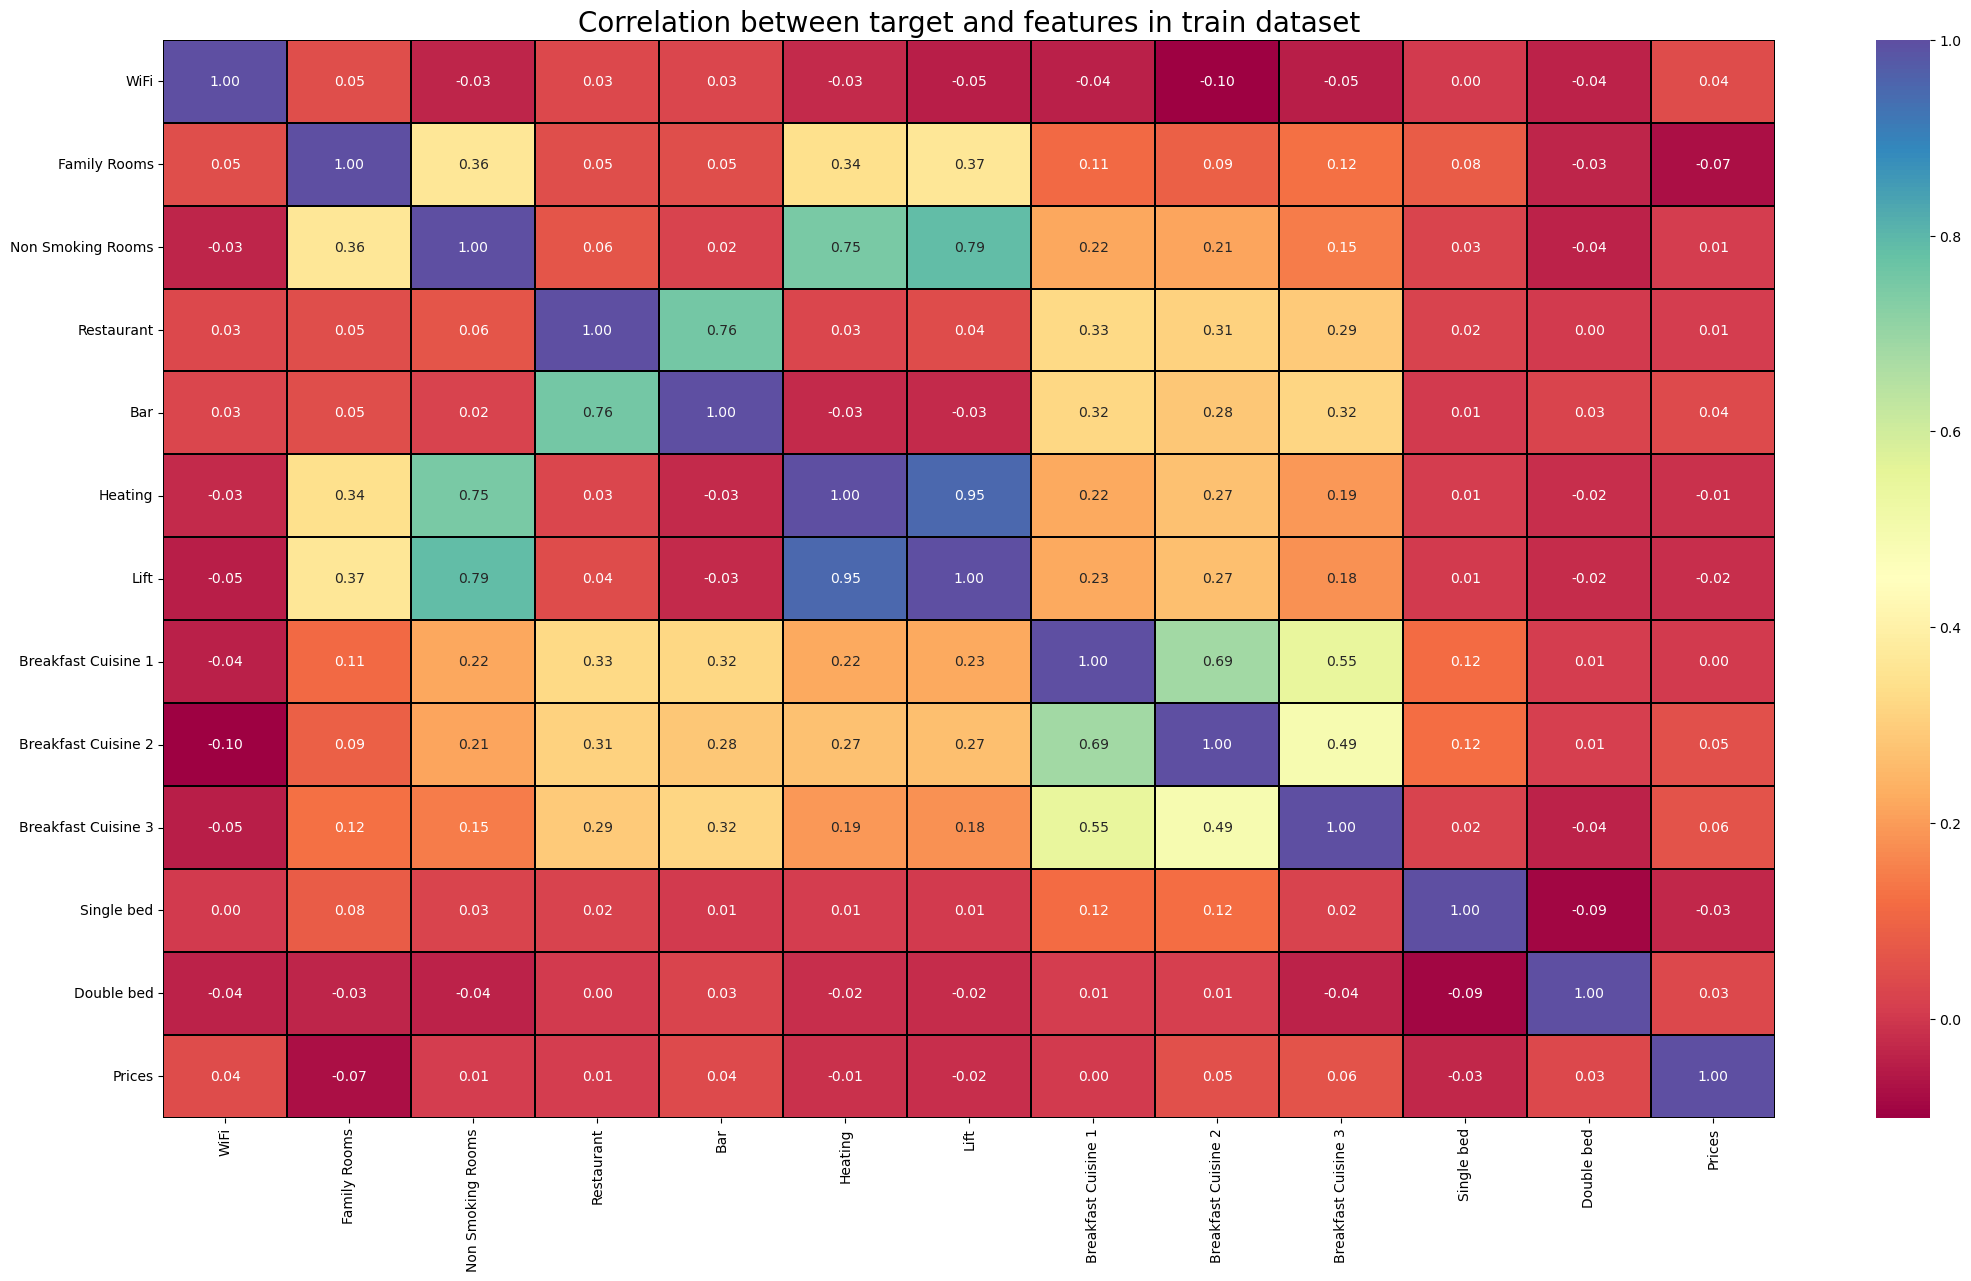

In [14]:
plt.figure(figsize = (26,14))
sns.heatmap(df.corr(), annot=True, fmt='0.2f', lw = 0.1, linecolor = 'black', cmap='Spectral')
plt.title ('Correlation between target and features in train dataset', fontsize = 20)
plt.show()

1    493
0    107
Name: WiFi, dtype: int64


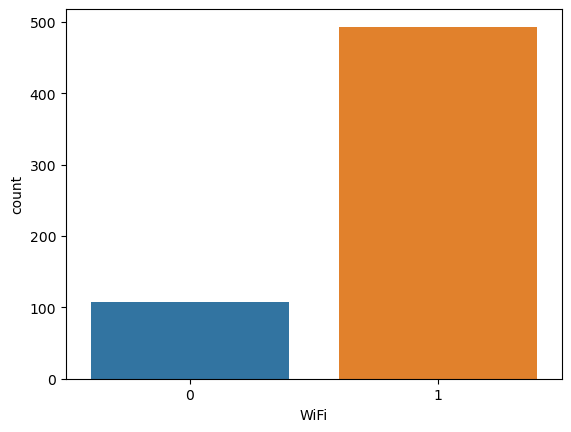

In [15]:
# visualizing the cout of WiFi in hotels
print(df['WiFi'].value_counts())
ax = sns.countplot(x='WiFi', data = df)
plt.show()

0    530
1     70
Name: Family Rooms, dtype: int64


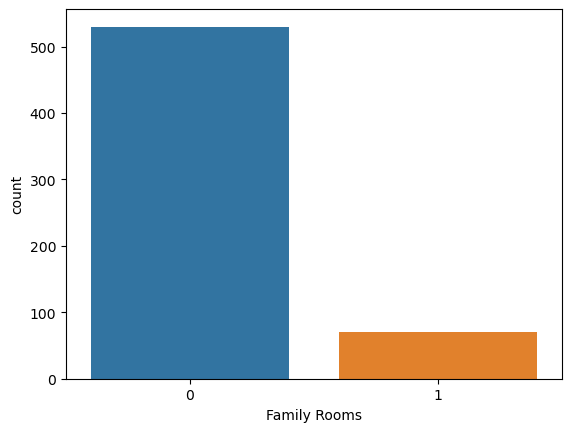

In [16]:
# visualizing the cout of Family rooms in hotels
print(df['Family Rooms'].value_counts())
ax = sns.countplot(x='Family Rooms', data = df)
plt.show()

0    540
1     60
Name: Non Smoking Rooms, dtype: int64


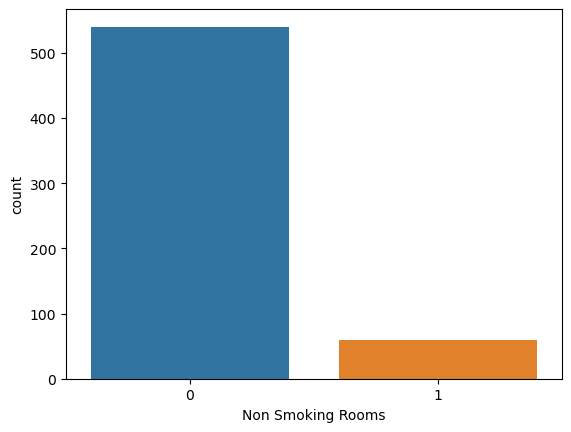

In [17]:
# visualizing the cout of Non Smoking rooms in hotels
print(df['Non Smoking Rooms'].value_counts())
ax = sns.countplot(x='Non Smoking Rooms', data = df)
plt.show()

1    313
0    287
Name: Restaurant, dtype: int64


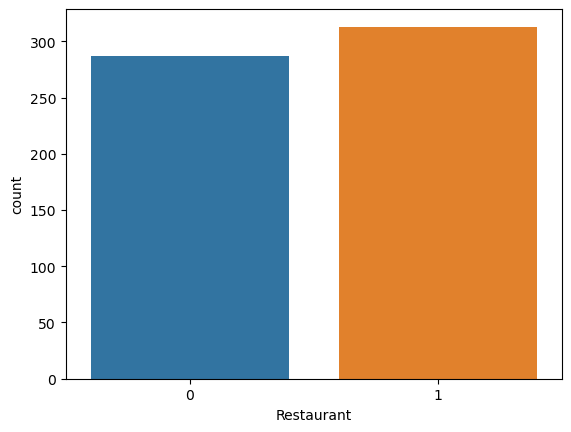

In [18]:
# visualizing the cout of restaurants in hotels
print(df['Restaurant'].value_counts())
ax = sns.countplot(x='Restaurant', data = df)
plt.show()

1    393
0    207
Name: Bar, dtype: int64


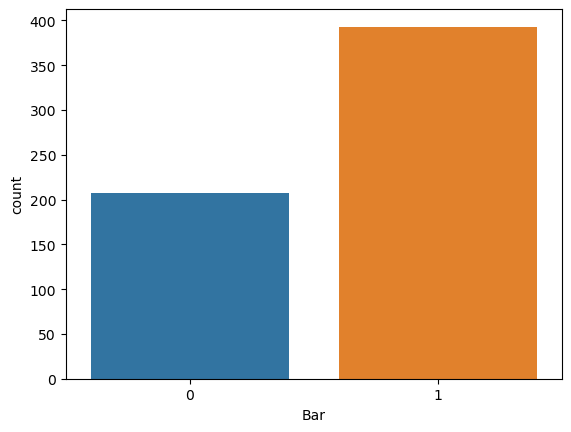

In [19]:
# visualizing the cout of Bars in hotels
print(df['Bar'].value_counts())
ax = sns.countplot(x='Bar', data = df)
plt.show()

0    501
1     99
Name: Heating, dtype: int64


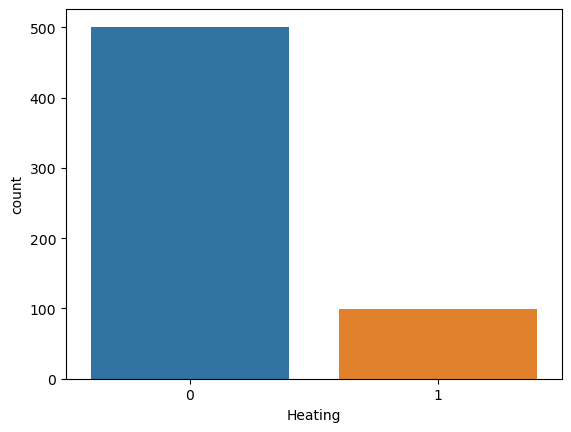

In [20]:
# visualizing the cout of heating in hotels
print(df['Heating'].value_counts())
ax = sns.countplot(x='Heating', data = df)
plt.show()

0    509
1     91
Name: Lift, dtype: int64


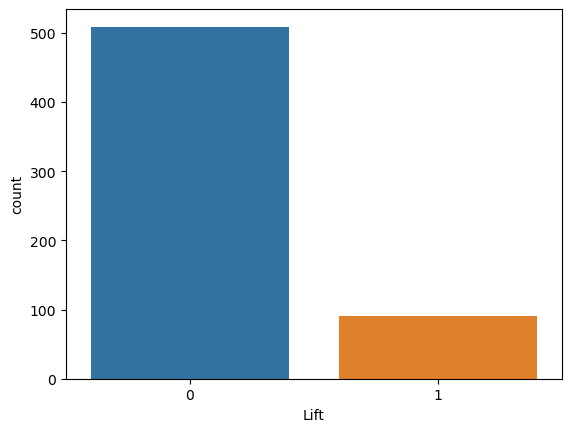

In [21]:
# visualizing the cout of Lift in hotels
print(df['Lift'].value_counts())
ax = sns.countplot(x='Lift', data = df)
plt.show()

Very good          159
Fabulous           147
Good                87
Superb              86
Exceptional         42
Pleasant            18
10 Exceptional      17
9.8 Exceptional      7
Passable             7
5.5 Passable         6
9.6 Exceptional      5
9.0 Superb           4
9.2 Superb           3
9.7 Exceptional      2
Disappointing        2
8.0 Very good        2
Bad                  1
Very poor            1
9.9 Exceptional      1
8.6 Fabulous         1
7.0 Good             1
9.3 Superb           1
Name: Users ratings, dtype: int64


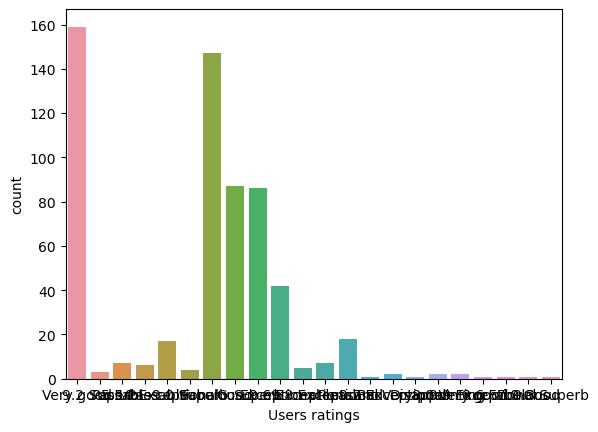

In [22]:
# Visualizing the count of users ratings 
print(df['Users ratings'].value_counts())
ax = sns.countplot(x='Users ratings', data = df)
plt.show()

In [23]:
df['Users ratings'] = df['Users ratings'].str.replace(r'\d+\.\d+', '', regex=True)

Very good         159
Fabulous          147
Good               87
Superb             86
Exceptional        42
Pleasant           18
10 Exceptional     17
 Exceptional       15
 Superb             8
Passable            7
 Passable           6
Disappointing       2
 Very good          2
Bad                 1
Very poor           1
 Fabulous           1
 Good               1
Name: Users ratings, dtype: int64


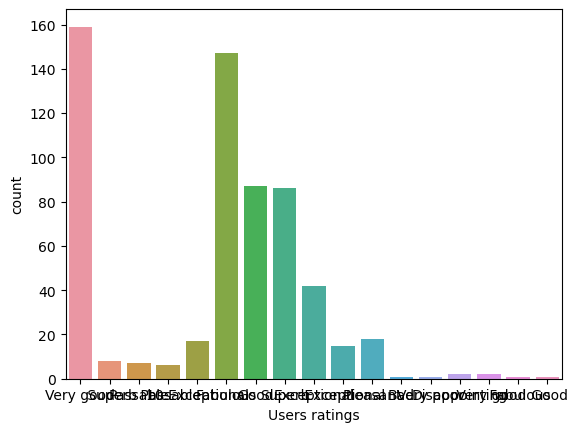

In [24]:
# Visualizing the count of MultipleLines
print(df['Users ratings'].value_counts())
ax = sns.countplot(x='Users ratings', data = df)
plt.show()

In [25]:
df['Users ratings'] = df['Users ratings'].str.lstrip()

In [26]:
#checking the list of counts of targe
df['Users ratings'].unique()

array(['Very good', 'Superb', 'Passable', '10 Exceptional', 'Fabulous',
       'Good', 'Exceptional', 'Pleasant', 'Bad', 'Very poor',
       'Disappointing'], dtype=object)

In [27]:
import re
df['Users ratings'] = df['Users ratings'].apply(lambda x: re.sub(r'\d+', '', x))

In [28]:
#checking the list of counts of targe
df['Users ratings'].unique()

array(['Very good', 'Superb', 'Passable', ' Exceptional', 'Fabulous',
       'Good', 'Exceptional', 'Pleasant', 'Bad', 'Very poor',
       'Disappointing'], dtype=object)

In [29]:
df['Users ratings'] = df['Users ratings'].str.lstrip()

In [30]:
#checking the list of counts of targe
df['Users ratings'].unique()

array(['Very good', 'Superb', 'Passable', 'Exceptional', 'Fabulous',
       'Good', 'Pleasant', 'Bad', 'Very poor', 'Disappointing'],
      dtype=object)

Very good        161
Fabulous         148
Superb            94
Good              88
Exceptional       74
Pleasant          18
Passable          13
Disappointing      2
Bad                1
Very poor          1
Name: Users ratings, dtype: int64


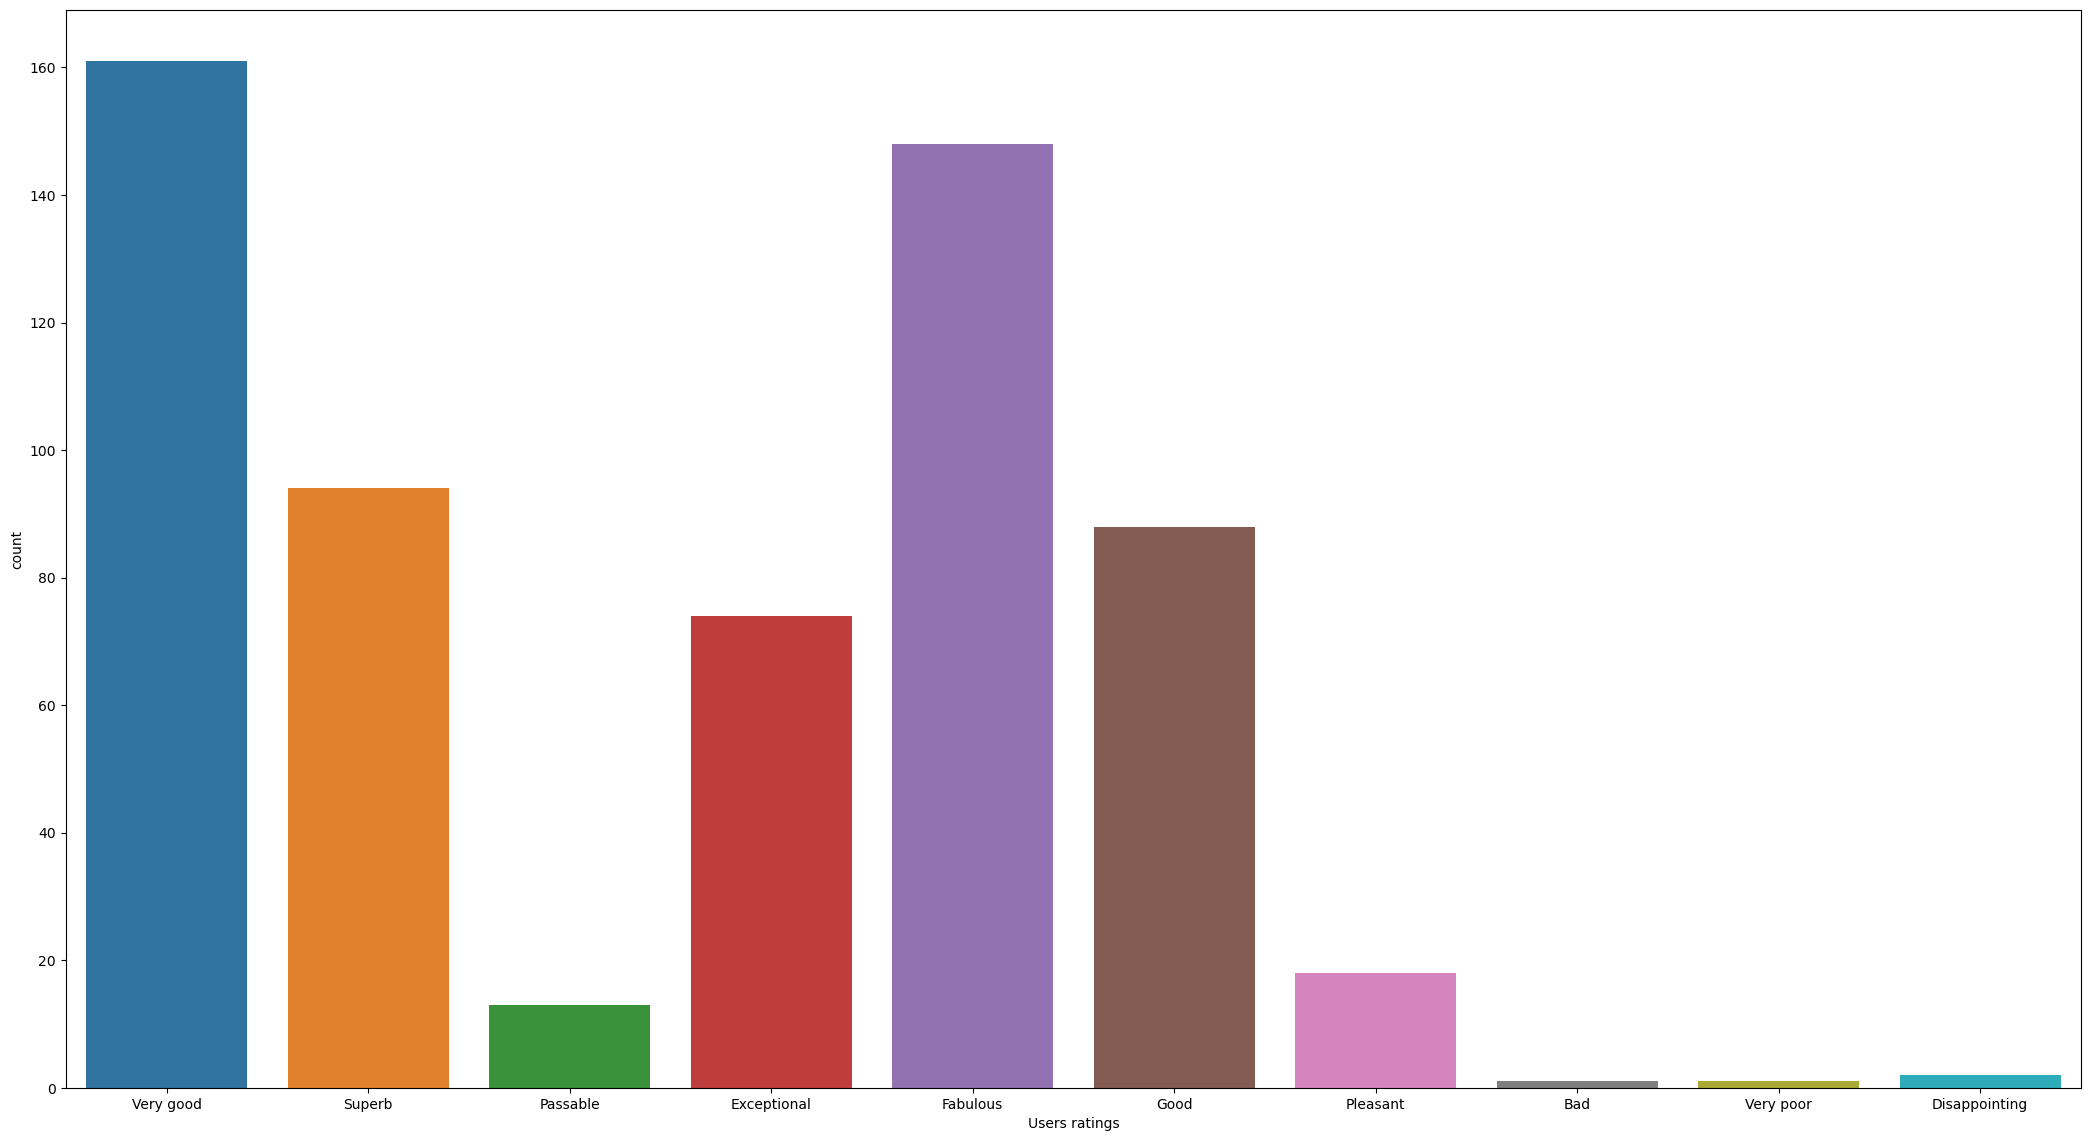

In [31]:
# Visualizing the count of MultipleLines
plt.figure(figsize = (26,14))
print(df['Users ratings'].value_counts())
ax = sns.countplot(x='Users ratings', data = df)
plt.show()

In the above case I observe that I have to clean the data because I had the same rating 2 or 3 times because it had some number or space in front so I had to proceed to remove that so my data frame could see only one rating. 

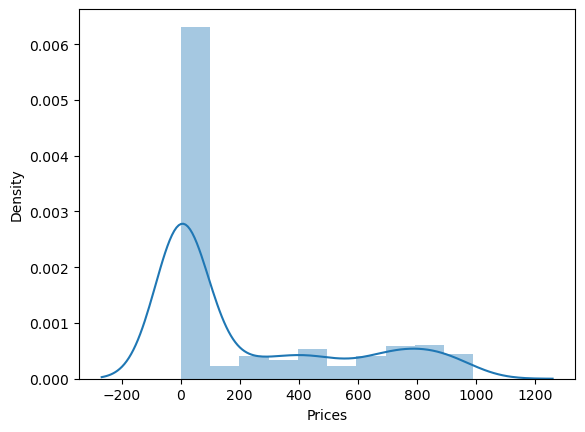

In [32]:
sns.distplot(df['Prices']);

In [ ]:
sns.pairplot(df, hue = 'Prices', palette = 'Dark2')
plt.show()

KeyboardInterrupt: 

In [33]:
# encoding categorical columns using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
OE= OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i] = OE.fit_transform(df[i].values.reshape(-1,1))

### Model prediction for prices

In [34]:
x = df.drop('Prices', axis = 1)
y = df['Prices']
print(x.shape)
print(y.shape)

(600, 19)
(600,)


In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,Hotel Name,City Name,Location,Number of reviews,Users ratings,Review score,WiFi,Family Rooms,Non Smoking Rooms,Restaurant,Bar,Heating,Lift,Breakfast Cuisine 1,Breakfast Cuisine 2,Breakfast Cuisine 3,Room type,Single bed,Double bed
0,-0.897781,-0.634870,0.774548,-0.729019,1.235468,0.217422,0.465874,-0.363422,-0.333333,0.957566,0.725753,-0.444528,-0.422826,-1.128152,-1.139671,0.484322,0.023647,-0.892416,0.081923
1,-1.688752,-0.634870,0.810435,-0.729019,1.235468,0.217422,0.465874,-0.363422,-0.333333,-1.044314,-1.377879,-0.444528,-0.422826,-1.128152,-1.139671,-2.064742,0.023647,-0.892416,0.081923
2,0.320430,-0.634870,0.553243,-0.729019,1.235468,0.217422,0.465874,-0.363422,-0.333333,-1.044314,-1.377879,-0.444528,-0.422826,-1.128152,-1.139671,-2.064742,0.956954,-0.892416,0.081923
3,-1.550188,-0.634870,0.726698,-0.729019,1.235468,0.217422,0.465874,2.751623,3.000000,0.957566,0.725753,2.249579,2.365038,0.886405,-1.139671,0.484322,0.023647,-0.892416,0.081923
4,-0.892007,-0.634870,1.587994,-0.729019,1.235468,0.217422,0.465874,-0.363422,-0.333333,-1.044314,-1.377879,-0.444528,-0.422826,-1.128152,-1.139671,-2.064742,-0.076350,1.120553,0.081923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.060622,1.489795,1.211177,1.559784,0.805989,1.150896,0.465874,-0.363422,-0.333333,-1.044314,-1.377879,-0.444528,-0.422826,-1.128152,-1.139671,-2.064742,0.368082,-0.892416,0.081923
596,-0.199186,1.489795,0.116614,-1.551054,0.805989,0.684159,-2.146503,-0.363422,-0.333333,-1.044314,0.725753,-0.444528,-0.422826,-1.128152,-1.139671,0.484322,-0.143014,-0.892416,0.081923
597,1.163362,1.489795,-0.134597,1.068175,1.235468,0.139632,-2.146503,-0.363422,-0.333333,-1.044314,-1.377879,-0.444528,-0.422826,0.886405,0.877446,0.484322,1.490272,-0.892416,0.081923
598,0.308883,1.489795,-1.187292,0.866696,-0.482448,-0.560473,0.465874,-0.363422,3.000000,0.957566,0.725753,2.249579,2.365038,-1.128152,-1.139671,-2.064742,-1.776301,-0.892416,0.081923


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor

In [37]:
model = [DecisionTreeRegressor(), KNeighborsRegressor(), GradientBoostingRegressor(), RandomForestRegressor()]
max_r2_score = 0 
for r_state in range (40,50):
    train_x,test_x,train_y,test_y = train_test_split(x,y,random_state = r_state, test_size = 0.30)
    for i in model:
        i.fit(train_x,train_y)
        pred = i.predict(test_x)
        r2_sc = r2_score(test_y,pred)
        print("R2 score correspond to random_state", r_state, 'is', r2_sc)
        if r2_sc>max_r2_score:
            max_r2_score=r2_sc
            final_state = r_state
            final_model = i
print()
print()
print()
print('max R2 score correspond to random state', final_state, 'is',max_r2_score,'and model is', final_model)


R2 score correspond to random_state 40 is -0.4015679734616464
R2 score correspond to random_state 40 is -0.15658163176754436
R2 score correspond to random_state 40 is 0.05919821261935265
R2 score correspond to random_state 40 is 0.10379171467987924
R2 score correspond to random_state 41 is -0.947841010854382
R2 score correspond to random_state 41 is -0.1379462182739697
R2 score correspond to random_state 41 is 0.11607487250452075
R2 score correspond to random_state 41 is 0.11642071832803436
R2 score correspond to random_state 42 is -0.31750504935430857
R2 score correspond to random_state 42 is -0.2586541776447182
R2 score correspond to random_state 42 is 0.13669887052248186
R2 score correspond to random_state 42 is 0.0879637614465626
R2 score correspond to random_state 43 is -0.4993324408135762
R2 score correspond to random_state 43 is -0.11101807270143804
R2 score correspond to random_state 43 is 0.09261001032711069
R2 score correspond to random_state 43 is 0.11634114183282052
R2 scor

In [39]:
from sklearn.model_selection import GridSearchCV

param = {'n_estimators':[50, 100, 120], 
         'loss':['squared_error', 'absolute_error'],
        'learning_rate':[0.1,0.4,0.9],
        'min_samples_split':[2, 10, 5.4],
        'max_leaf_nodes':[10, 11, 20]}

gscv = GridSearchCV(GradientBoostingRegressor(),param, cv=5)
gscv.fit(train_x, train_y)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.1, 0.4, 0.9],
                         'loss': ['squared_error', 'absolute_error'],
                         'max_leaf_nodes': [10, 11, 20],
                         'min_samples_split': [2, 10, 5.4],
                         'n_estimators': [50, 100, 120]})

In [40]:
gscv.best_params_

{'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_leaf_nodes': 10,
 'min_samples_split': 2,
 'n_estimators': 50}

In [42]:
Model = GradientBoostingRegressor(n_estimators = 50 , loss = 'squared_error', learning_rate = 0.1, min_samples_split = 2, max_leaf_nodes = 10)

In [43]:
Model.fit(train_x, train_y)
pred=Model.predict(test_x)
print('R2_score:', r2_score(test_y,pred))
print('Mean Absolute Error:', mean_absolute_error(test_y, pred))
print('Mean Squared Error:', mean_squared_error(test_y, pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(test_y, pred)))

R2_score: 0.0898962936959834
Mean Absolute Error: 236.7226984155594
Mean Squared Error: 83849.17669450029
Root Mean Squared Error: 289.5672231011312


In [ ]:
import joblib
joblib.dump(Model, 'Booking_project_prices.pkl')

In [ ]:
plt.scatter(x=test_y,y=pred)
plt.xlabel('Y_test')
plt.ylabel('predicted_Y')

In [ ]:
# lets load the saved model and get the predictions
model = joblib.load('Booking_project_prices.pkl')

# prediction
prediction = model.predict(test_x)
prediction

In [ ]:
a = np.array(test_y) # this is to convert y_test intro array
df_ap = pd.DataFrame({'Predicted':prediction,'Orignial':a})
df_ap

In [ ]:
conclusion = pd.DataFrame([model.predict(test_x)[:]], index = ['Predicted','Original'])
conclusion

### Model prediction for user rating

In [44]:
x = df.drop('Users ratings', axis = 1)
y = df['Users ratings']
print(x.shape)
print(y.shape)

(600, 19)
(600,)


In [45]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu = 0 
maxRS = 0
for i in range(1,200): # we can take any rainge
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.30, random_state = i)
    RFR = RandomForestClassifier()
    RFR.fit(x_train, y_train)
    pred = RFR.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print ('Best accuracy is', maxAccu, 'at random_State', maxRS)

Best accuracy is 0.9722222222222222 at random_State 159


In [49]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state = maxRS)

In [50]:
# Checking accuracy for RandomForestClasifier

RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test, predRFC))

0.9722222222222222
[[ 0  0  0  0  0  0  0  0]
 [ 0 25  0  0  0  0  2  0]
 [ 0  0 35  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0]
 [ 1  1  0  0  2  0  0  0]
 [ 0  1  0  0  0  1  0  0]
 [ 0  0  0  0  0  0 27  0]
 [ 0  0  0  0  0  0  0 59]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         0
         2.0       0.93      0.93      0.93        27
         3.0       1.00      1.00      1.00        35
         4.0       1.00      1.00      1.00        26
         5.0       1.00      0.50      0.67         4
         6.0       1.00      0.50      0.67         2
         7.0       0.93      1.00      0.96        27
         8.0       1.00      1.00      1.00        59

    accuracy                           0.97       180
   macro avg       0.86      0.74      0.78       180
weighted avg       0.98      0.97      0.97       180



In [51]:
# Checking accuracy for Support Vector Machine Classifier 

svc = SVC()
svc.fit(x_train, y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test, predsvc))

0.22777777777777777
[[ 0 18  0  0  0  0  9]
 [ 0 22  0  0  0  0 13]
 [ 0 17  0  0  0  0  9]
 [ 0  3  0  0  0  0  1]
 [ 0  1  0  0  0  0  1]
 [ 0 25  1  0  0  0  1]
 [ 0 38  2  0  0  0 19]]
              precision    recall  f1-score   support

         2.0       0.00      0.00      0.00        27
         3.0       0.18      0.63      0.28        35
         4.0       0.00      0.00      0.00        26
         5.0       0.00      0.00      0.00         4
         6.0       0.00      0.00      0.00         2
         7.0       0.00      0.00      0.00        27
         8.0       0.36      0.32      0.34        59

    accuracy                           0.23       180
   macro avg       0.08      0.14      0.09       180
weighted avg       0.15      0.23      0.17       180



In [52]:
# Checking accuracy for Bagging Classifier 
BC= BaggingClassifier()
BC.fit(x_train, y_train)
predBC = BC.predict(x_test)
print(accuracy_score(y_test, predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test, predBC))

0.9888888888888889
[[ 0  0  0  0  0  0  0  0]
 [ 0 27  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0]
 [ 2  0  0  0  2  0  0  0]
 [ 0  0  0  0  0  2  0  0]
 [ 0  0  0  0  0  0 27  0]
 [ 0  0  0  0  0  0  0 59]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         0
         2.0       1.00      1.00      1.00        27
         3.0       1.00      1.00      1.00        35
         4.0       1.00      1.00      1.00        26
         5.0       1.00      0.50      0.67         4
         6.0       1.00      1.00      1.00         2
         7.0       1.00      1.00      1.00        27
         8.0       1.00      1.00      1.00        59

    accuracy                           0.99       180
   macro avg       0.88      0.81      0.83       180
weighted avg       1.00      0.99      0.99       180



In [53]:
#Checking accuracy for ExtraTreesClassifier 
ET= ExtraTreesClassifier()
ET.fit(x_train, y_train)
predET = ET.predict(x_test)
print(accuracy_score(y_test, predET))
print(confusion_matrix(y_test, predET))
print(classification_report(y_test, predET))

0.7444444444444445
[[24  0  0  0  0  2  1]
 [ 0 28  0  0  0  2  5]
 [ 1  1 18  0  0  0  6]
 [ 1  0  0  3  0  0  0]
 [ 0  0  1  1  0  0  0]
 [ 0 11  0  0  0 15  1]
 [ 0 10  2  0  0  1 46]]
              precision    recall  f1-score   support

         2.0       0.92      0.89      0.91        27
         3.0       0.56      0.80      0.66        35
         4.0       0.86      0.69      0.77        26
         5.0       0.75      0.75      0.75         4
         6.0       0.00      0.00      0.00         2
         7.0       0.75      0.56      0.64        27
         8.0       0.78      0.78      0.78        59

    accuracy                           0.74       180
   macro avg       0.66      0.64      0.64       180
weighted avg       0.76      0.74      0.74       180



In [54]:
ABC = AdaBoostClassifier()
ABC.fit(x_train, y_train)
predABC = ABC.predict(x_test)
print(accuracy_score(y_test, predABC))
print(confusion_matrix(y_test, predABC))
print(classification_report(y_test, predABC))

0.5388888888888889
[[11  0  0  0  0 16  0]
 [ 0  0  0  0  0 35  0]
 [ 0  0  0  0  0  0 26]
 [ 4  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0]
 [ 0  0  0  0  0 27  0]
 [ 0  0  0  0  0  0 59]]
              precision    recall  f1-score   support

         2.0       0.65      0.41      0.50        27
         3.0       0.00      0.00      0.00        35
         4.0       0.00      0.00      0.00        26
         5.0       0.00      0.00      0.00         4
         6.0       0.00      0.00      0.00         2
         7.0       0.35      1.00      0.51        27
         8.0       0.69      1.00      0.82        59

    accuracy                           0.54       180
   macro avg       0.24      0.34      0.26       180
weighted avg       0.38      0.54      0.42       180



In [56]:
# Checking cv score for RFC
score = cross_val_score(RFC, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is -', accuracy_score(y_test, predRFC) - score.mean())

[0.95833333 0.93333333 0.94166667 0.84166667 0.90833333]
0.9166666666666666
Difference between Accuracy score and cross validation score is - 0.05555555555555558


In [57]:
# Checking cv score for SVC
score = cross_val_score(svc, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is -', accuracy_score(y_test, predsvc) - score.mean())

[0.20833333 0.21666667 0.225      0.24166667 0.25      ]
0.22833333333333333
Difference between Accuracy score and cross validation score is - -0.0005555555555555591


In [58]:
# Checking cv score for BC
score = cross_val_score(BC, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is -', accuracy_score(y_test, predBC) - score.mean())

[1.         0.99166667 0.98333333 0.99166667 0.99166667]
0.9916666666666668
Difference between Accuracy score and cross validation score is - -0.002777777777777879


In [59]:
# Checking cv score for ET
score = cross_val_score(ET, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is -', accuracy_score(y_test, predET) - score.mean())

[0.75833333 0.76666667 0.76666667 0.61666667 0.7       ]
0.7216666666666667
Difference between Accuracy score and cross validation score is - 0.022777777777777786


In [60]:
# Checking cv score for ABC
score = cross_val_score(ABC, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is -', accuracy_score(y_test, predABC) - score.mean())

[0.48333333 0.55       0.78333333 0.45833333 0.51666667]
0.5583333333333333
Difference between Accuracy score and cross validation score is - -0.019444444444444486


In [61]:
# ExtraTreesClassifier 
from sklearn.model_selection import GridSearchCV

parameters = {'bootstrap': [True, False],
              'max_samples': [1,10,30],
              'random_state':[10, 50, 11],
              'n_jobs':[-2,-1,1],
              'n_estimators':[10, 15,20,50]}
GCV= GridSearchCV(BaggingClassifier(), parameters, cv = 5)
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(),
             param_grid={'bootstrap': [True, False], 'max_samples': [1, 10, 30],
                         'n_estimators': [10, 15, 20, 50],
                         'n_jobs': [-2, -1, 1], 'random_state': [10, 50, 11]})

In [62]:
GCV.best_params_

{'bootstrap': False,
 'max_samples': 30,
 'n_estimators': 50,
 'n_jobs': -2,
 'random_state': 10}

In [63]:
Final_model = BaggingClassifier(bootstrap = False, max_samples = 30, n_estimators = 50, n_jobs = -2, random_state = 10)
Final_model.fit(x_train, y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test, pred)
print(acc*100)

96.66666666666667


In [ ]:
import joblib
joblib.dump(Final_model, 'Booking_project_users_ratings.pkl')

In [ ]:
# lets load the saved model and get the predictions
model = joblib.load('Booking_project_users_ratings.pkl')

# prediction
prediction = model.predict(x_test)
prediction

In [ ]:
a = np.array(y_test) # this is to convert y_test intro array
df_r = pd.DataFrame({'Predicted':prediction,'Orignial':a})
df_r

In [ ]:
conclusion = pd.DataFrame([model.predict(x_test)[:]], index = ['Predicted','Original'])
conclusion